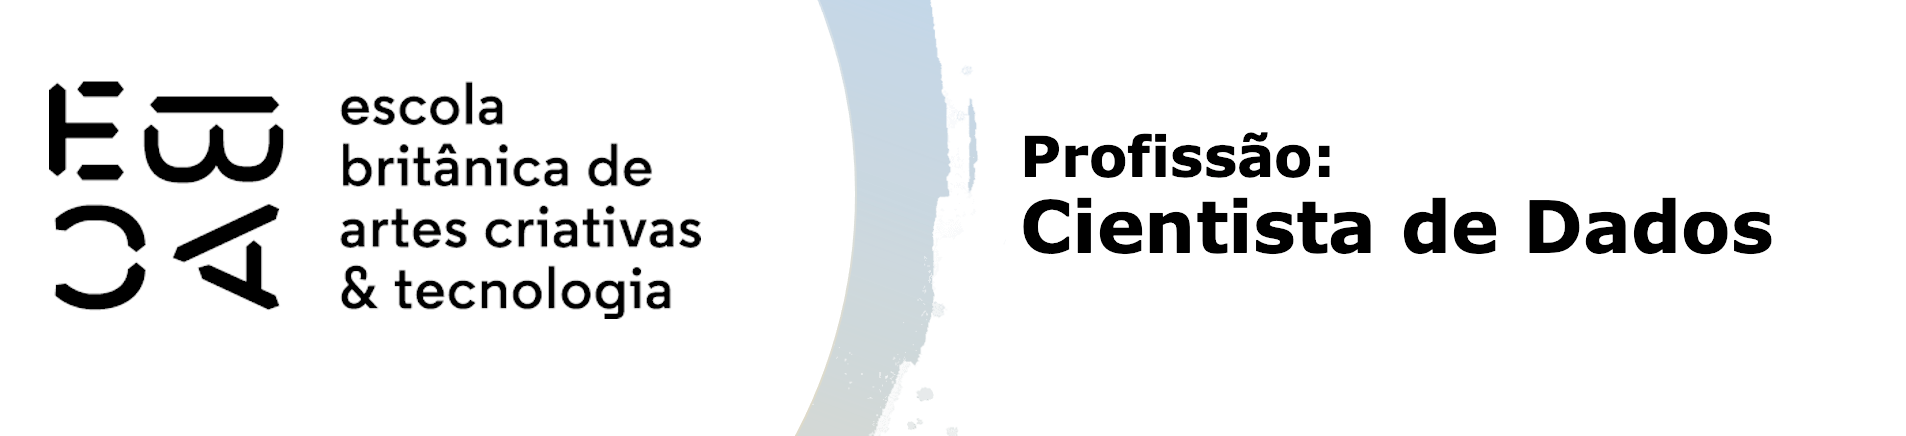

# Métodos hierárquicos de agrupamento - Tarefa

In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

import scipy.cluster.hierarchy as shc

## 1) Repetindo o que fizemos em aula

Primeiramente vamos repetir o que fizemos em aula com a base de pinguins.

1. Selecione as variáveis quantitativas da base de pinguins
2. Elimine valores faltantes
3. Padronize as variáveis para média zero e desvio padrão 1
4. Faça um agrupamento hierárquico dividindo essa base em 3 grupos
5. Faça o Dendrograma

In [119]:
# importando a base de dados de pinguins:

peng = sns.load_dataset('penguins')

# nomeando o index de 'id' para posteriormente fazer um join pelo 'id':

peng.index.name='id'

# selecionando as variaveis quantitativas e eliminando os valores missing:

peng_num = peng.select_dtypes(include='number').dropna()

In [120]:
# padronizando as variaveis para media 0 e desvio padrao 1:

padronizador = StandardScaler()
peng_pad = padronizador.fit_transform(peng_num)

In [121]:
# fazendo um agrupamento hierárquico e dividindo a base em 3 grupos:

clus_3 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=3)

# fittando o algoritmo:

clus_3.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=3)

In [122]:
# marcando a base original com o atributo labels_:

peng_num['grupo_3'] = clus_3.labels_
peng_num.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo_3
id,,,,,
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,1
2,40.3,18.0,195.0,3250.0,1


In [123]:
# fazendo um left_join com a chave index('id') devido a alteração de numeração das linhas pela remoção dos valores missing:

peng = peng.merge(peng_num['grupo_3'], how='left', on='id')

In [124]:
peng.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_3
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0


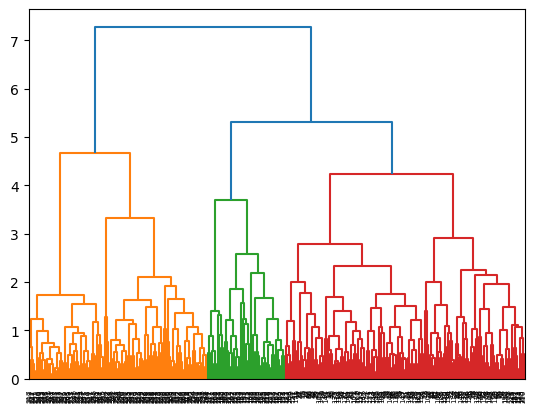

In [125]:
# plotando o dendrograma:

dend = shc.dendrogram(shc.linkage(peng_pad, method='complete'))

## 2) Avalie os grupos

Descreva os grupos:

- Quantos pinguins de cada espécie há em cada grupo?
- Descreva as variáveis quantitativas de cada grupo com as técnicas que você preferir.

In [126]:
# fazendo uma crosstab com a relação de pinguins por espécie presentes em cada grupo:

pd.crosstab(peng['species'], peng['grupo_3'])

grupo_3,0.0,1.0,2.0
species,,,
Adelie,0,151,0
Chinstrap,0,14,54
Gentoo,123,0,0


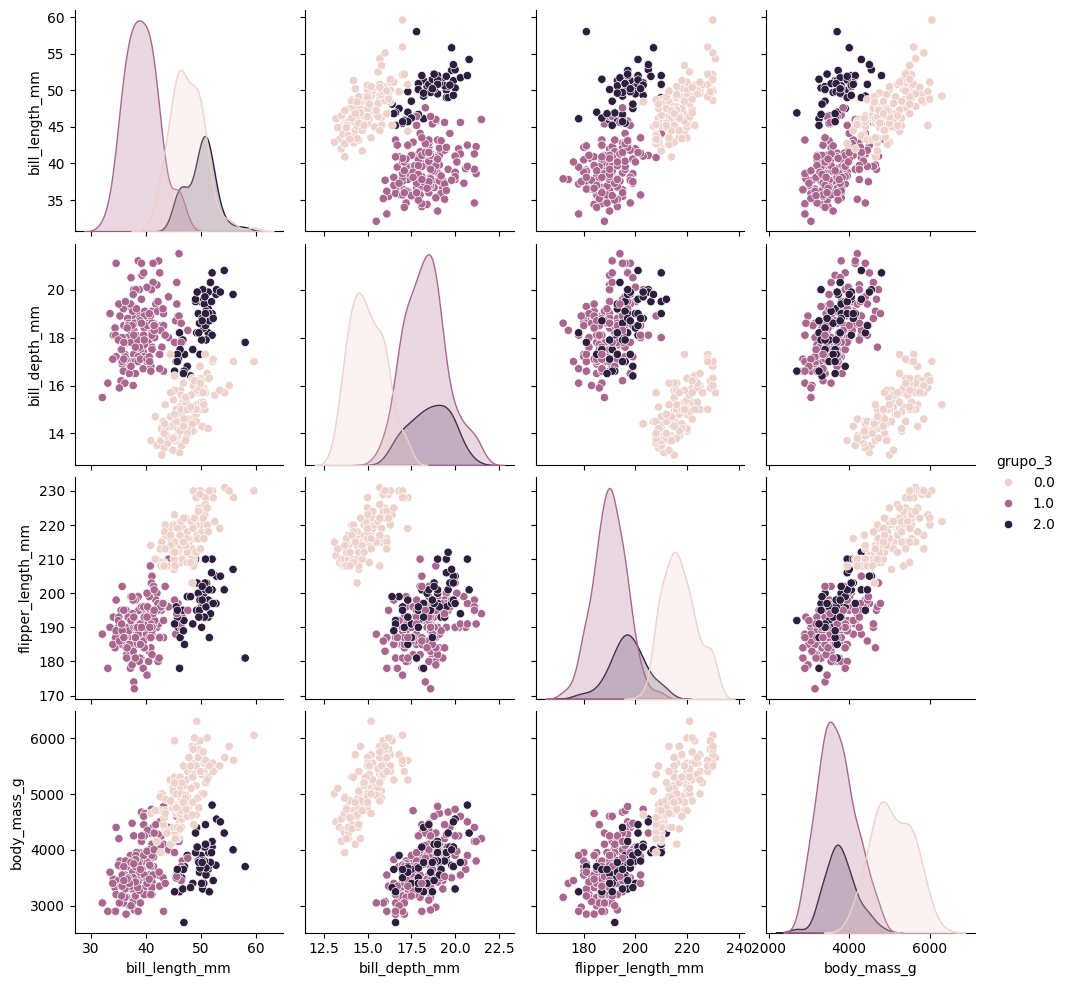

In [127]:
# fazendo um pairplot por 'grupo_3':

sns.pairplot(data=peng, hue='grupo_3');

Podemos verificar através da análise gráfica os seguintes pontos:

 - Os grupos 0 e 1 são bem definidos entre si em relação à maioria das variáveis;
 - Os grupos 1 e 2 são difíceis de diferenciar de acordo com as variáveis: 'body_mass_g', 'flipper_length_mm' e 'bill_depth_mm';
 - Os grupos 0 e 2 são difíceis de diferenciar em relação à variável 'bill_length_mm';
 - O grupo 0 tem os maiores valores de 'body_mass_g', 'flipper_length_mm' e os menores valores de 'bill_depth_mm';
 - O grupo 1 tem os maiores valores de 'bill_depth_mm' (juntamente com o grupo 2), porém tem os menores valores de 'body_mass_g', 'flipper_length_mm' (juntamente também com o grupo 2) e 'bill_length_mm';
 - O grupo 2 se confunde com o grupo 0 na variável 'bill_length_mm', onde as duas tem os maiores valores. Porém podem ser diferenciados quanto a 'flipper_length_mm', 'body_mass_g' e 'bill_depth_mm', onde são bem definidos entre si.
 

## 3) Alterando o agrupamento

O Dendrogarma sugere que podemem haver grupos interessantes se solicitarmos mais que 3 grupos. Se quisermos testar o agrupamento com mais de 3 grupos, quantos grupos o Dendrograma te sugere? (Dica: não faça mais que 6 grupos).

- Faça o agrupamento hierárquico semelhante ao anterior, mas com o número de grupos que você escolheu.
- Analise esses agrupamentos
    - Quantos pinguins de cada espécie há em cada grupo?
    - Quantos pinguins de cada espécie machos e fêmeas há em cada grupo?
- Na sua opinião, o agrupamento capturou algum padrão natural dos dados? Qual?

In [128]:
# fazendo um agrupamento hierárquico e dividindo a base em 5 grupos:

clus_6 = AgglomerativeClustering(linkage="complete", 
                                 distance_threshold = None, 
                                 n_clusters=6)

# fittando o algoritmo:

clus_6.fit(peng_pad)

AgglomerativeClustering(linkage='complete', n_clusters=6)

In [129]:
# marcando a base original com o atributo labels_:

peng_num['grupo_6'] = clus_6.labels_
peng_num.head(3)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,grupo_3,grupo_6
id,,,,,,
0,39.1,18.7,181.0,3750.0,1,1
1,39.5,17.4,186.0,3800.0,1,1
2,40.3,18.0,195.0,3250.0,1,1


In [130]:
# fazendo um left_join com a chave index('id') devido a alteração de numeração das linhas pela remoção dos valores missing:

peng = peng.merge(peng_num['grupo_6'], how='left', on='id')

In [131]:
# removendo a coluna 'grupo_3'

peng = peng.drop(columns=['grupo_3'])

In [132]:
peng

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,grupo_6
id,,,,,,,,
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male,1.0
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female,1.0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female,1.0
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female,1.0
...,...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female,3.0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male,0.0


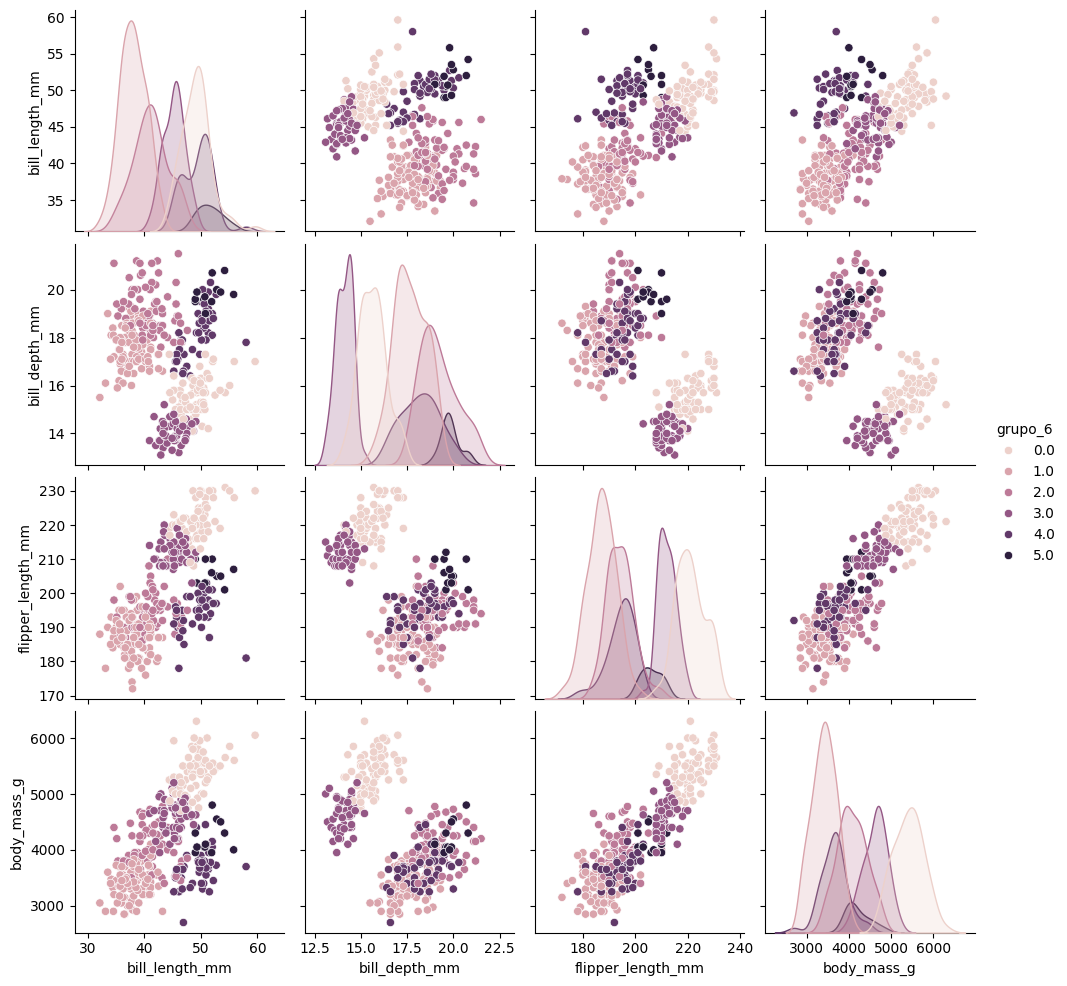

In [133]:
# fazendo um pairplot por 'grupo_6':

sns.pairplot(data=peng, hue='grupo_6');

In [134]:
# fazendo uma crosstab com a relação de pinguins por espécie presentes em cada grupo:

pd.crosstab(peng['species'], peng['grupo_6'])

grupo_6,0.0,1.0,2.0,3.0,4.0,5.0
species,,,,,,
Adelie,0,91,60,0,0,0
Chinstrap,0,5,9,0,42,12
Gentoo,71,0,0,52,0,0


In [135]:
pd.crosstab(peng['sex'], peng['grupo_6'])

grupo_6,0.0,1.0,2.0,3.0,4.0,5.0
sex,,,,,,
Female,9,74,13,49,20,0
Male,61,18,55,0,22,12


In [136]:
# relação de pinguins por espécie e sexo em cada grupo:

pd.crosstab([peng['species'], peng['sex']], peng['grupo_6'])

grupo_6           0.0  1.0  2.0  3.0  4.0  5.0
species   sex                                 
Adelie    Female    0   69    4    0    0    0
          Male      0   18   55    0    0    0
Chinstrap Female    0    5    9    0   20    0
          Male      0    0    0    0   22   12
Gentoo    Female    9    0    0   49    0    0
          Male     61    0    0    0    0    0

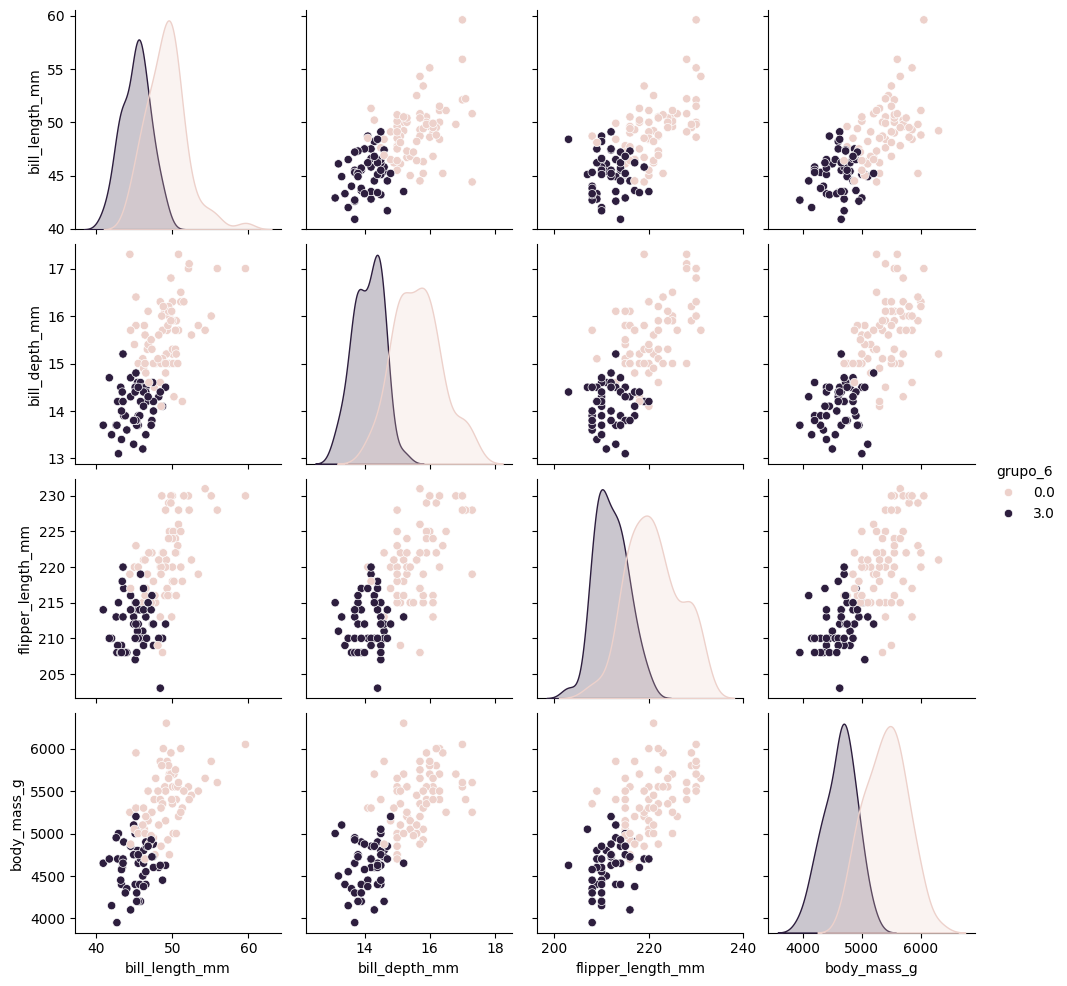

In [137]:
# fazendo um pairplot da espécie Gentoo por grupos:

sns.pairplot(data = peng[peng['species'] == 'Gentoo'], hue='grupo_6');

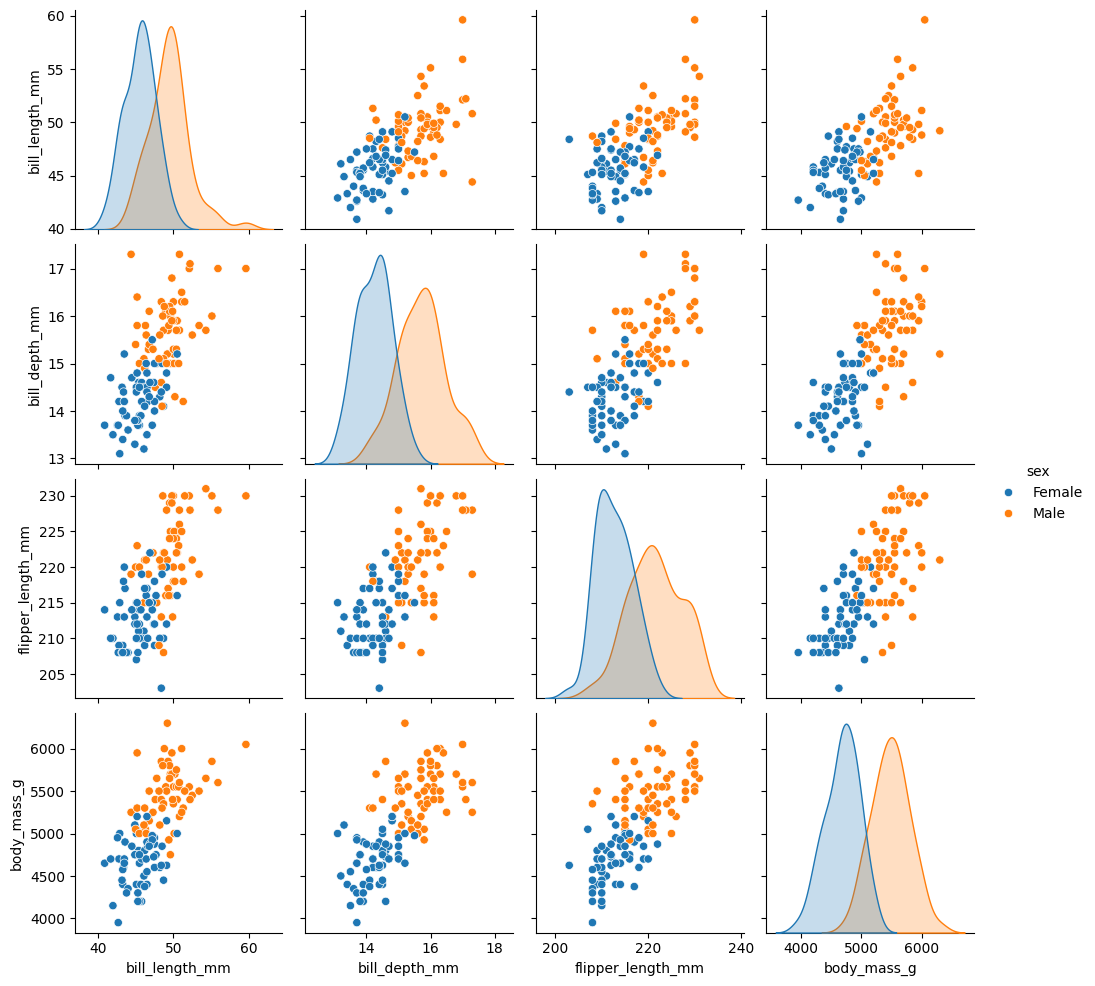

In [138]:
# fazendo um pairplot da espécie Gentoo por sexo para comparar com os grupos:

sns.pairplot(data = peng[peng['species'] == 'Gentoo'].drop(columns = 'grupo_6'), hue='sex');

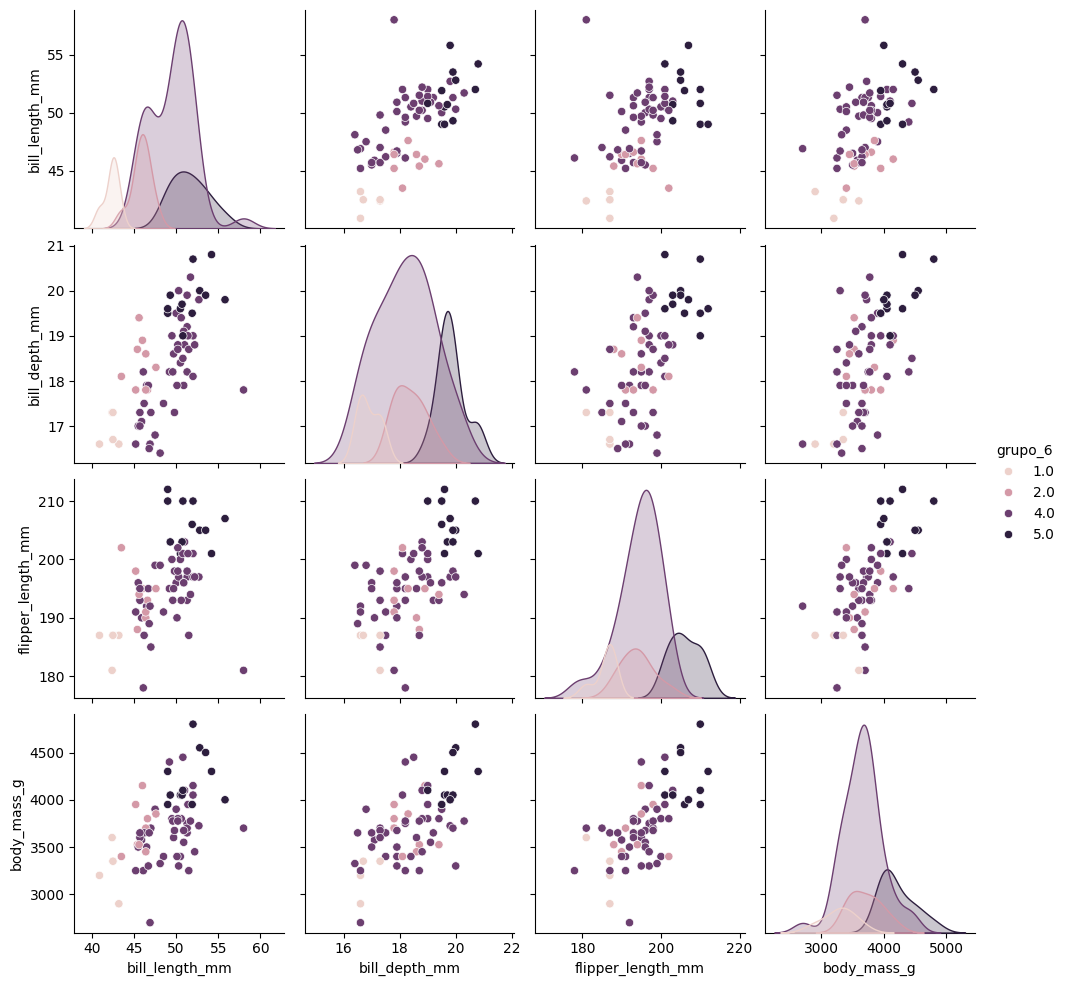

In [139]:
# fazendo um pairplot da espécie Chinstrap por grupos:

sns.pairplot(data = peng[peng['species'] == 'Chinstrap'], hue='grupo_6');

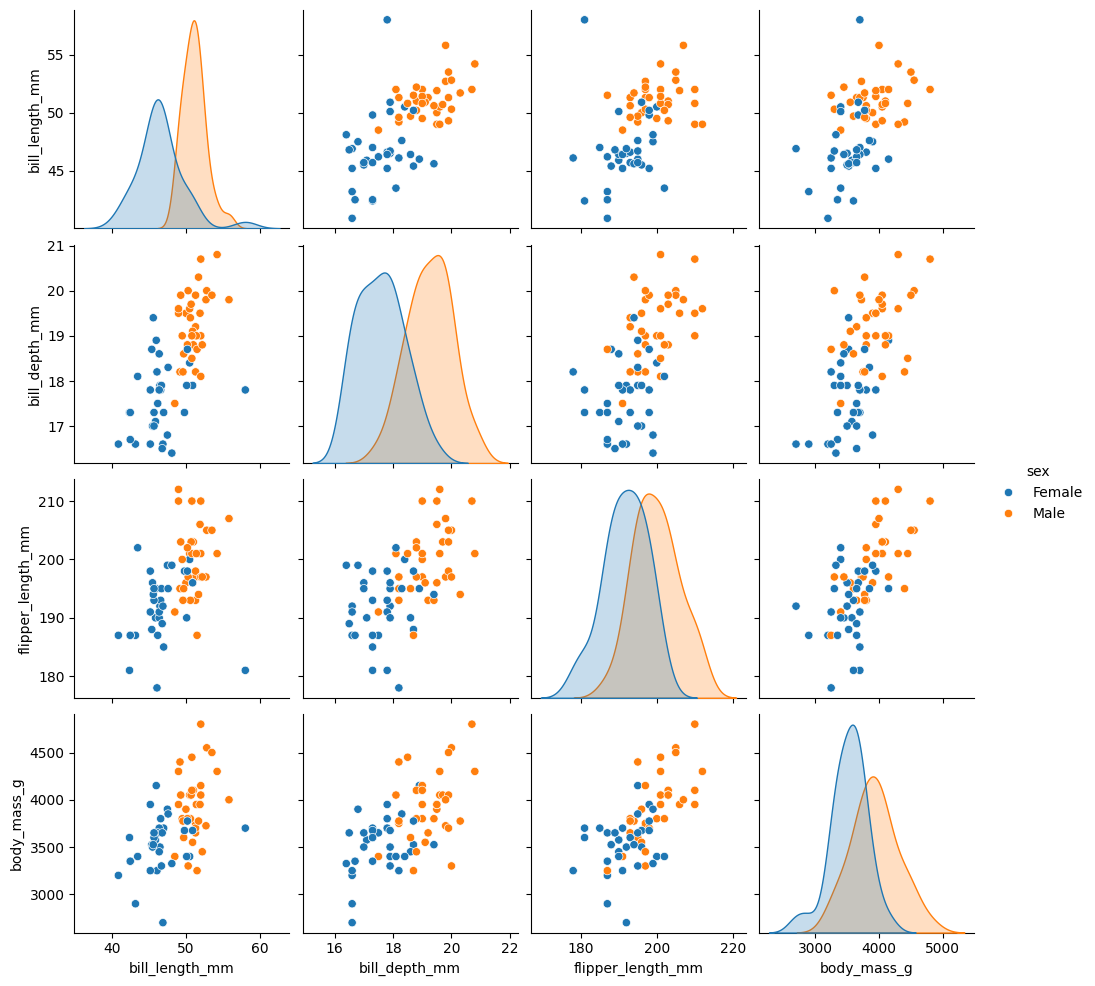

In [140]:
# fazendo um pairplot da espécie Chinstrap por sexo para comparar com os grupos:

sns.pairplot(data = peng[peng['species'] == 'Chinstrap'].drop(columns = 'grupo_6'), hue='sex');

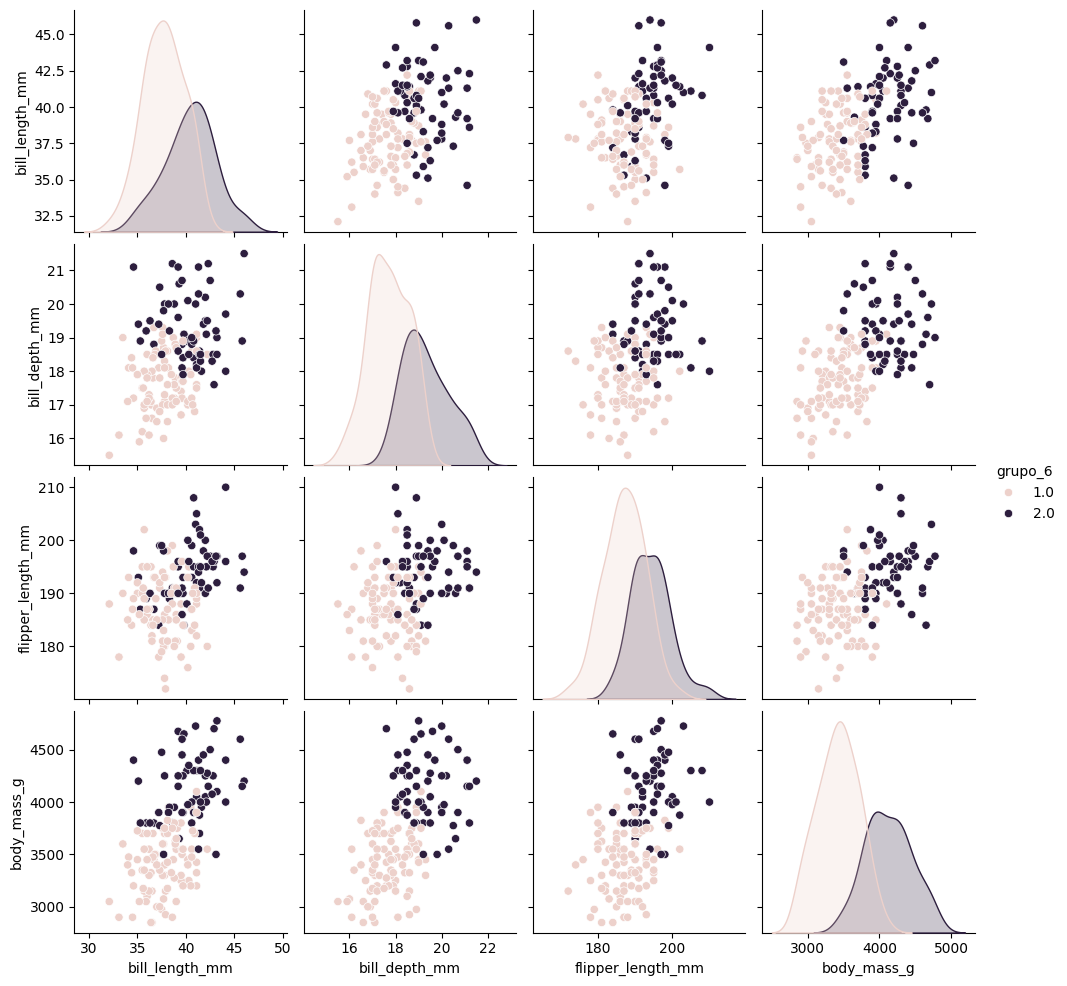

In [141]:
# fazendo um pairplot da espécie Adelie por grupos:

sns.pairplot(data = peng[peng['species'] == 'Adelie'], hue='grupo_6');

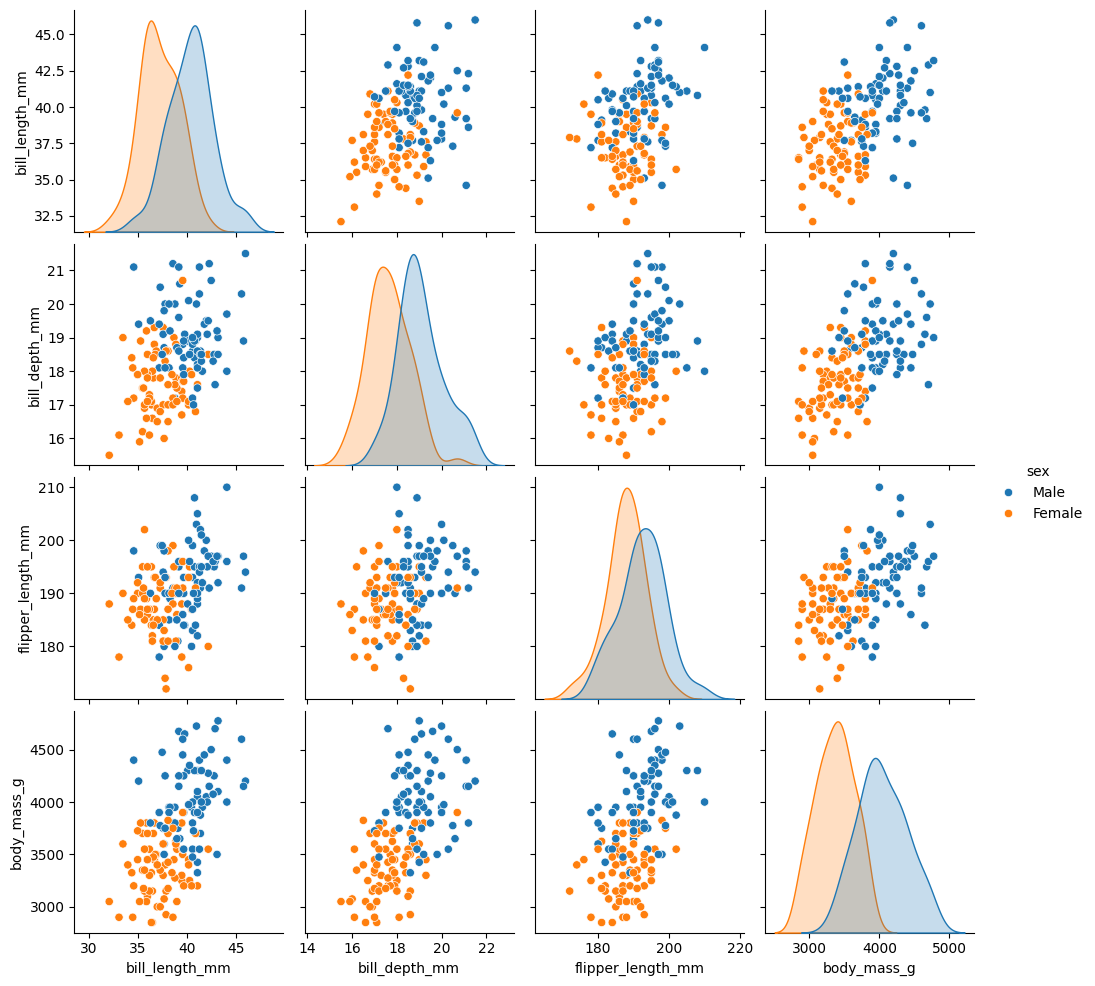

In [142]:
# fazendo um pairplot da espécie Adelie por sexo para comparar com os grupos:

sns.pairplot(data = peng[peng['species'] == 'Adelie'].drop(columns = 'grupo_6'), hue='sex');

Podemos identificar os seguintes padrões nos dados:


 - Quando mudamos a quantidade de grupos, pudemos identificar que o algoritmo dividiu em 3 espécies, e depois utilizou as medidas antropométricas para dividir cada uma das espécies em machos e fêmeas;

 - No agrupamento em 6 grupos por espécie, podemos novamente unir em um só grupo os grupos (0-3); (4-5) e (1-2), onde possivelmente foram as quebras de 3 em 6 grupos;
 


 - No agrupamento por sexo podemos observar por exemplo que o grupo 3 por espécies possui 52 Gentoos, enquanto no grupo 3 por sexo possuem 49 fêmeas e 0 machos. Podemos então supor que os 3 Gentoos restantes estão se confundindo com alguma outra espécie, possivelmente pelos machos restantes terem medidas antropométricas parecidas com machos ou fêmeas de algum outro grupo (possivelmente os grupos (1-2), devido às variáveis 'body_mass_g', 'bill_depth_mm', e 'bill_lenght_mm', e na proporção 'bill_lenght_mm' / 'body_mass_g'.  
 


 - Podemos verificar que as espécies Gentoo e Adelie podem ser bem definidas em relação ao sexo, já a Chinstrap não é claramente definida, onde se confunde em vários grupos apenas pela diferenciação por sexo.